<a href="https://colab.research.google.com/github/saritmaitra/Trading-strategy/blob/master/LSTM_%26_GRU_CIPLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CIPLA.NS.csv to CIPLA.NS.csv


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import data 
df = pd.read_csv("CIPLA.NS.csv", parse_dates= True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,112.800003,116.587997,110.403999,116.587997,69.387695,263250.0
1,1/4/2000,122.959999,122.959999,114.400002,117.220001,69.763824,377688.0
2,1/5/2000,117.919998,117.919998,109.199997,114.804001,68.325935,422488.0
3,1/6/2000,114.720001,114.800003,107.919998,108.468002,64.555061,413538.0
4,1/7/2000,109.599998,111.192001,99.792000,99.804001,59.398636,831700.0
...,...,...,...,...,...,...,...
4962,10/25/2019,447.100006,461.450012,441.750000,459.850006,459.850006,2647759.0
4963,10/29/2019,463.899994,478.399994,462.000000,473.049988,473.049988,3498572.0
4964,10/30/2019,478.950012,478.950012,462.250000,465.000000,465.000000,2640132.0
4965,10/31/2019,465.000000,472.700012,460.149994,466.850006,466.850006,3944718.0


In [ ]:
print(df.info())
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1572 non-null   object 
 1   Open       1518 non-null   float64
 2   High       1518 non-null   float64
 3   Low        1517 non-null   float64
 4   Close      1517 non-null   float64
 5   Adj Close  1517 non-null   float64
 6   Volume     1517 non-null   float64
dtypes: float64(6), object(1)
memory usage: 86.1+ KB
None


Date          0
Open         54
High         54
Low          55
Close        55
Adj Close    55
Volume       55
dtype: int64


In [ ]:
df = df.fillna(method ='pad') # filling the missing values with previous ones 
print (df.isnull().sum())
print('\n')
print('There are {} number of days in the dataset.'.format(df.shape[0]))

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


There are 4967 number of days in the dataset.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x432 with 0 Axes>

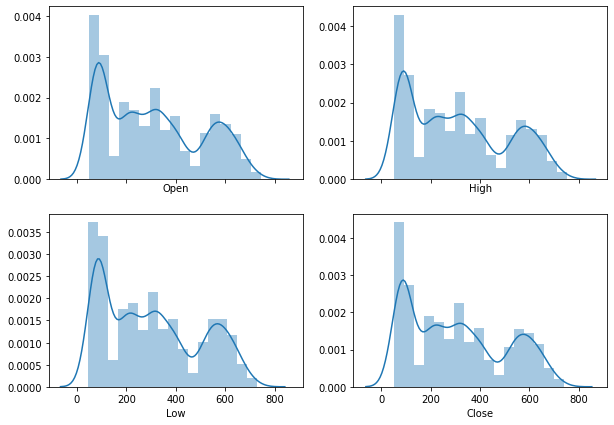

,Open,High,Low,Close
count,4967.000000,4967.000000,4967.000000,4967.000000
mean,306.183467,310.184928,301.469348,305.608403
std,195.187484,197.185347,192.772437,194.813300
min,48.080002,50.959999,44.891998,50.180000
25%,106.740002,108.320000,104.490002,106.250000
50%,283.500000,287.000000,277.049988,282.200012
75%,468.000000,472.500000,460.800003,467.324997
max,744.950012,752.849976,730.250000,739.599976


In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))

dataset = df[['Open', 'High', 'Low', 'Close']] # dataframe with open, high, low, close

print("\n")
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.distplot( dataset["Open"] , ax=axes[0, 0])
sns.distplot( dataset["High"] , ax=axes[0, 1])
sns.distplot(dataset["Low"] , ax=axes[1, 0])
sns.distplot( dataset["Close"] , ax=axes[1, 1])
plt.show()
print('\n')
dataset.describe()

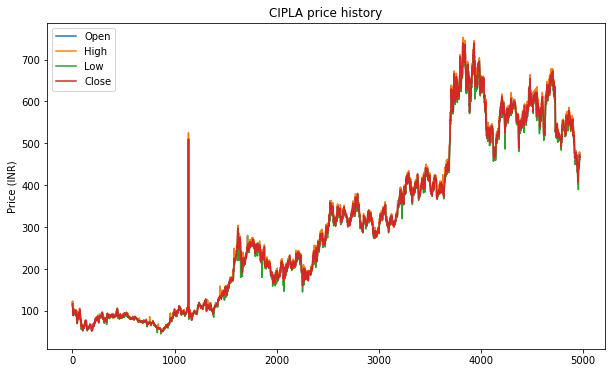

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(10,6))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('CIPLA price history')
plt.ylabel('Price (INR)')
plt.legend(['Open','High','Low','Close'], loc='best')
plt.show()

In [ ]:
import copy
data = dataset.copy()
tek_ind_1 = copy.deepcopy(data)
tek_ind_2 = copy.deepcopy(data)

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

In [ ]:
from talib import RSI, BBANDS

tek_ind_1['daily_return'] = tek_ind_1.Close.pct_change().fillna(0)
tek_ind_1['cum_daily_return'] = (1 + tek_ind_1['daily_return']).cumprod()

tek_ind_1['H-L'] = tek_ind_1.High - dataset.Low

tek_ind_1 ['C-O'] = tek_ind_1.Close - tek_ind_1.Open

tek_ind_1['10day MA'] = tek_ind_1.Close.shift(1).rolling(window = 10).mean().fillna(0)
tek_ind_1['50day MA'] = tek_ind_1.Close.shift(1).rolling(window = 50).mean().fillna(0)
tek_ind_1['200day MA'] = tek_ind_1.Close.shift(1).rolling(window = 200).mean().fillna(0)

tek_ind_1['rsi'] = talib.RSI(tek_ind_1.Close.values, timeperiod = 14)

tek_ind_1['Williams %R'] = talib.WILLR(tek_ind_1.High.values, 
                                     tek_ind_1.Low.values, 
                                     tek_ind_1.Close.values, 14)

# Create 7 and 21 days Moving Average
tek_ind_1['ma7'] = tek_ind_1.Close.rolling(window=7).mean().fillna(0)
tek_ind_1['ma21'] = tek_ind_1.Close.rolling(window=21).mean().fillna(0)
    
# Creating MACD
tek_ind_1['ema_26'] = tek_ind_1.Close.ewm(span=26).mean().fillna(0)
tek_ind_1['ema_12'] = tek_ind_1.Close.ewm(span=12).mean().fillna(0)
tek_ind_1['macd'] = (tek_ind_1['ema_12'] - tek_ind_1['ema_26'])

# Creating Bollinger Bands
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = tek_ind_1.Close.rolling(window).mean()
rolling_std = tek_ind_1.Close.rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
#B['Rolling Mean'] = rolling_mean.fillna(0)
tek_ind_1['bb_high'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
tek_ind_1['bb_low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)
    
# Create Exponential moving average
tek_ind_1['ema'] = tek_ind_1.Close.ewm(com=0.5).mean()
    
# Create Momentum
tek_ind_1['momentum'] = tek_ind_1.Close - 1

tek_ind_1.head(20)

,Open,High,Low,Close,daily_return,cum_daily_return,H-L,C-O,10day MA,50day MA,200day MA,rsi,Williams %R,ma7,ma21,ema_26,ema_12,macd,bb_high,bb_low,ema,momentum
0,112.800003,116.587997,110.403999,116.587997,0.000000,1.000000,6.183998,3.787994,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,116.587997,116.587997,0.000000,0.0,0.0,116.587997,115.587997
1,122.959999,122.959999,114.400002,117.220001,0.005421,1.005421,8.559997,-5.739998,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,116.916153,116.930332,0.014180,0.0,0.0,117.062000,116.220001
2,117.919998,117.919998,109.199997,114.804001,-0.020611,0.984698,8.720001,-3.115997,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,116.157277,116.100425,-0.056852,0.0,0.0,115.498770,113.804001
3,114.720001,114.800003,107.919998,108.468002,-0.055190,0.930353,6.880005,-6.251999,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,114.007692,113.691167,-0.316525,0.0,0.0,110.753002,107.468002
4,109.599998,111.192001,99.792000,99.804001,-0.079876,0.856040,11.400001,-9.795997,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,110.713797,109.918074,-0.795724,0.0,0.0,103.423505,98.804001
5,103.040001,103.919998,95.279999,96.472000,-0.033385,0.827461,8.639999,-6.568001,0.000000,0.0,0.0,NaN,NaN,0.000000,0.0,107.861279,106.649970,-1.211309,0.0,0.0,98.782803,95.472000
6,98.000000,98.000000,88.755997,89.139999,-0.076001,0.764573,9.244003,-8.860001,0.000000,0.0,0.0,NaN,NaN,106.070857,0.0,104.531796,102.742682,-1.789115,0.0,0.0,92.351326,88.139999
7,94.800003,96.272003,94.800003,96.272003,0.080009,0.825745,1.472000,1.472000,0.000000,0.0,0.0,NaN,NaN,103.168572,0.0,103.200939,101.392351,-1.808588,0.0,0.0,94.965509,95.272003
8,103.975998,103.975998,102.496002,103.764000,0.077821,0.890006,1.479996,-0.211998,0.000000,0.0,0.0,NaN,NaN,101.246287,0.0,103.284397,101.861547,-1.422850,0.0,0.0,100.831468,102.764000
9,103.919998,104.363998,97.599998,102.456001,-0.012606,0.878787,6.764000,-1.463997,0.000000,0.0,0.0,NaN,NaN,99.482287,0.0,103.170086,101.974196,-1.195890,0.0,0.0,101.914508,101.456001


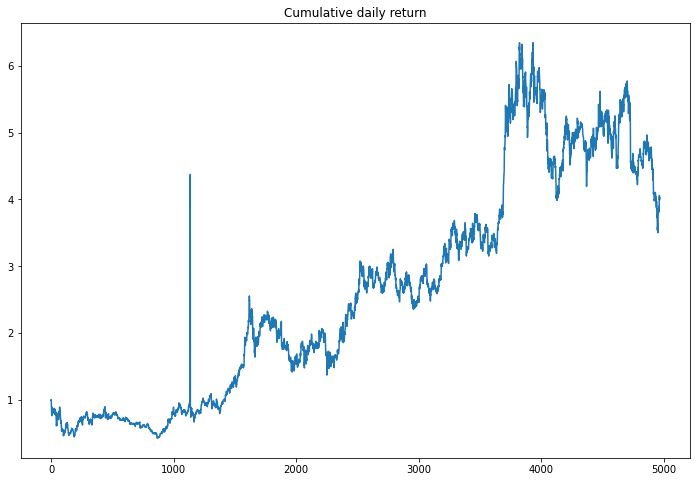

In [ ]:
# Plot the cumulative daily returns
tek_ind_1['cum_daily_return'].plot(figsize=(12,8))
plt.title('Cumulative daily return')

# Show the plot
plt.show()

In [ ]:
tek_ind_1['daily_return'].describe()

count    4967.000000
mean        0.001096
std         0.059350
min        -0.795261
25%        -0.009333
50%         0.000000
75%         0.010142
max         3.861169
Name: daily_return, dtype: float64

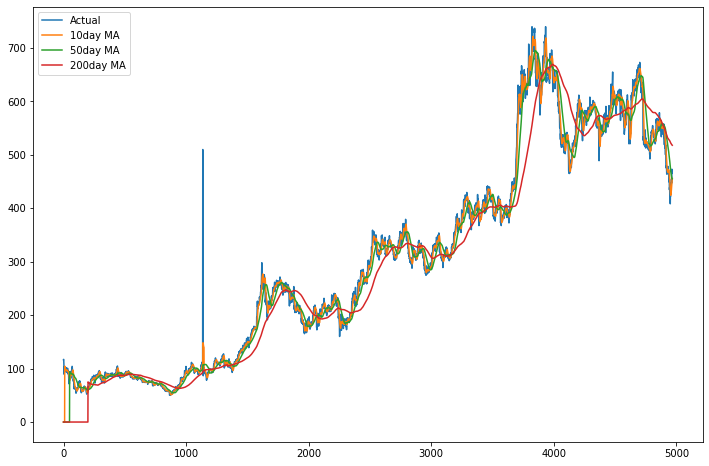

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              4967 non-null   float64
 1   High              4967 non-null   float64
 2   Low               4967 non-null   float64
 3   Close             4967 non-null   float64
 4   daily_return      4967 non-null   float64
 5   cum_daily_return  4967 non-null   float64
 6   H-L               4967 non-null   float64
 7   C-O               4967 non-null   float64
 8   10day MA          4967 non-null   float64
 9   50day MA          4967 non-null   float64
 10  200day MA         4967 non-null   float64
 11  rsi               4953 non-null   float64
 12  Williams %R       4954 non-null   float64
 13  ma7               4967 non-null   float64
 14  ma21              4967 non-null   float64
 15  ema_26            4967 non-null   float64
 16  ema_12            4967 non-null   float64


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(tek_ind_1['Close'], label='Actual')
plt.plot(tek_ind_1['10day MA'], label='10day MA')
plt.plot(tek_ind_1['50day MA'], label='50day MA')
plt.plot(tek_ind_1['200day MA'], label='200day MA')

plt.legend(loc='best')
plt.show()
print(tek_ind_1.info())

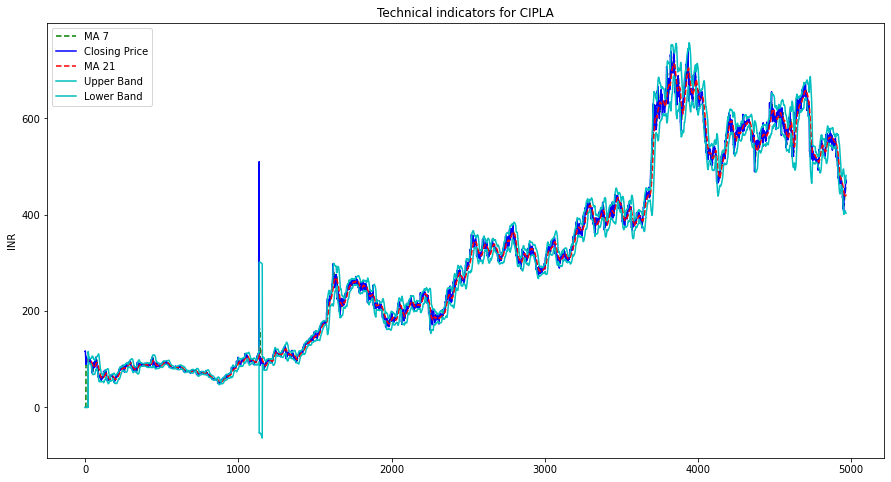

In [ ]:
# Plot first subplot
plt.figure(figsize=(15,8))
plt.plot(tek_ind_1['ma7'],label='MA 7', color='g',linestyle='--')
plt.plot(tek_ind_1['Close'],label='Closing Price', color='b')
plt.plot(tek_ind_1['ma21'],label='MA 21', color='r',linestyle='--')
plt.plot(tek_ind_1['bb_high'],label='Upper Band', color='c')
plt.plot(tek_ind_1['bb_low'],label='Lower Band', color='c')
plt.title('Technical indicators for CIPLA')
plt.ylabel('INR')
plt.legend()

##tek_ind_2 **dataframe**

In [ ]:
def stok(df, n):
    tek_ind_2['stok'] = ((tek_ind_2['Close'] - tek_ind_2['Low'].rolling(window=n, center=False).mean()) / 
                  (tek_ind_2['High'].rolling(window=n, center=False).max() - 
                   tek_ind_2['Low'].rolling(window=n, center=False).min())) * 100
    tek_ind_2['stok'] = tek_ind_2['stok'].rolling(window = 3, center=False).mean()
    
stok(tek_ind_2, 4)
tek_ind_2 = tek_ind_2.fillna(0)
tek_ind_2.tail()

,Open,High,Low,Close,stok,stod
1567,175.979996,176.000000,173.600006,175.759995,38.510013,16.741410
1568,175.600006,177.199997,174.860001,175.880005,37.310641,24.704057
1569,175.960007,177.179993,172.440002,175.679993,41.041555,38.954070
1570,177.160004,177.580002,171.639999,172.860001,-4.629644,24.574184
1571,174.399994,199.600000,171.639999,172.860001,0.768958,12.393623


### CCI = (typical price − ma) / (0.015 * mean deviation)
- typical price = (high + low + close) / 3
- p = number of periods (20 commonly used)
- ma = moving average
- moving average = typical price / p
- mean deviation = (typical price - MA) / p
### Calculations of Ichimoku Cloud
- Turning Line = ( Highest High + Lowest Low ) / 2, for the past 9 days
- Standard Line = ( Highest High + Lowest Low ) / 2, for the past 26 days
- Leading Span 1 = ( Standard Line + Turning Line ) / 2, plotted 26 days ahead of today
- Leading Span 2 = ( Highest High + Lowest Low ) / 2, for the past 52 days, plotted 26 days ahead of today
- Cloud = Shaded Area between Span 1 and Span 2

In [ ]:
#Calculation of Price Rate of Change
# ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100

tek_ind_2['ROC'] = ((tek_ind_2['Close'] - tek_ind_2['Close'].shift(12)) / 
                    (tek_ind_2['Close'].shift(12)))*100
tek_ind_2 = tek_ind_2.fillna(0)

#Calculation of Momentum
tek_ind_2['Momentum'] = tek_ind_2['Close'] - tek_ind_2['Close'].shift(4)
tek_ind_2 = tek_ind_2.fillna(0)

#Calculation of Commodity Channel Index
tp = (tek_ind_2['High'] + tek_ind_2['Low'] + tek_ind_2['Close']) / 3
ma = tp / 20
md = (tp - ma) / 20
tek_ind_2['CCI'] = (tp-ma)/(0.015 * md)

# Calculation of Triple Exponential Moving Average
# Triple Exponential MA Formula:
# T-EMA = (3EMA – 3EMA(EMA)) + EMA(EMA(EMA))
# Where:
# EMA = EMA(1) + α * (Close – EMA(1))
# α = 2 / (N + 1)
# N = The smoothing period.

tek_ind_2['ema'] = tek_ind_2['Close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean()
tek_ind_2 = tek_ind_2.fillna(0)

tek_ind_2['tema'] = (3 * tek_ind_2['ema'] - 3 * tek_ind_2['ema'] * tek_ind_2['ema']) + (tek_ind_2['ema'] * 
                                                                                        tek_ind_2['ema'] * 
                                                                                        tek_ind_2['ema'])


# Turning Line
high = tek_ind_2['High'].rolling(window=9,center=False).max()
low = tek_ind_2['Low'].rolling(window=9,center=False).min()
tek_ind_2['turning_line'] = (high + low) / 2

# Standard Line
p26_high = tek_ind_2['High'].rolling(window=26,center=False).max()
p26_low = tek_ind_2['Low'].rolling(window=26,center=False).min()
tek_ind_2['standard_line'] = (p26_high + p26_low) / 2

# Leading Span 1
tek_ind_2['ichimoku_span1'] = ((tek_ind_2['turning_line'] + tek_ind_2['standard_line']) / 2).shift(26)

# Leading Span 1
tek_ind_2['ichimoku_span1'] = ((tek_ind_2['turning_line'] + tek_ind_2['standard_line']) / 2).shift(26)
    
# Leading Span 2
p52_high = tek_ind_2['High'].rolling(window=52,center=False).max()
p52_low = tek_ind_2['Low'].rolling(window=52,center=False).min()
tek_ind_2['ichimoku_span2'] = ((p52_high + p52_low) / 2).shift(26)
    
# The most current closing price plotted 22 time periods behind (optional)
tek_ind_2['chikou_span'] = tek_ind_2['Close'].shift(-22) # 22 according to investopedia    

### Fourier transformation

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


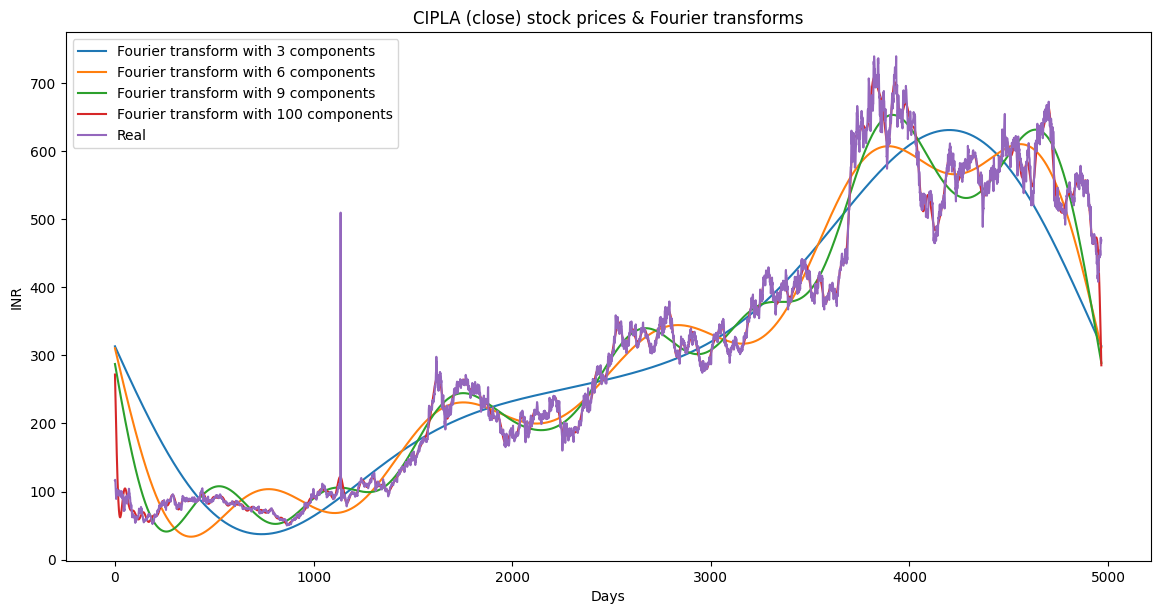

In [ ]:
close_fft = np.fft.fft(np.asarray(dataset.Close.tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(tek_ind_2.Close,  label='Real')
plt.xlabel('Days')
plt.ylabel('INR')
plt.title('CIPLA (close) stock prices & Fourier transforms')
plt.legend()
plt.show()

In [ ]:
tek_ind_2['absolute'] = fft_df['absolute']
tek_ind_2['angle'] = fft_df['angle']
print(tek_ind_2.head().fillna(0))
print('\n')
print(tek_ind_2.info())

         Open        High         Low       Close      absolute         angle
0  112.800003  116.587997  110.403999  116.587997  1.517957e+06 -1.484786e-17
1  122.959999  122.959999  114.400002  117.220001  5.652691e+05  1.437638e+00
2  117.919998  117.919998  109.199997  114.804001  2.859098e+05  1.714023e+00
3  114.720001  114.800003  107.919998  108.468002  9.966513e+04  1.873925e+00
4  109.599998  111.192001   99.792000   99.804001  3.057921e+04  1.200927e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      4967 non-null   float64
 1   High      4967 non-null   float64
 2   Low       4967 non-null   float64
 3   Close     4967 non-null   float64
 4   absolute  4967 non-null   float64
 5   angle     4967 non-null   float64
dtypes: float64(6)
memory usage: 233.0 KB
None


## **LSTM Model for Prediction of movement of stocks**

In [ ]:
print(tek_ind_1.columns)

Index(['Open', 'High', 'Low', 'Close', 'daily_return', 'cum_daily_return',
       'H-L', 'C-O', '10day MA', '50day MA', '200day MA', 'rsi', 'Williams %R',
       'ma7', 'ma21', 'ema_26', 'ema_12', 'macd', 'bb_high', 'bb_low', 'ema',
       'momentum'],
      dtype='object')


In [ ]:
a = copy.deepcopy(tek_ind_1)
#b = copy.deepcopy(tek_ind_2)
print(a.head())
print('\n')
print('Total dataset has {} samples, and {} features.'.format(a.shape[0], a.shape[1]))
print('\n')
a.info()

         Open        High         Low  ...  bb_low         ema    momentum
0  112.800003  116.587997  110.403999  ...     0.0  116.587997  115.587997
1  122.959999  122.959999  114.400002  ...     0.0  117.062000  116.220001
2  117.919998  117.919998  109.199997  ...     0.0  115.498770  113.804001
3  114.720001  114.800003  107.919998  ...     0.0  110.753002  107.468002
4  109.599998  111.192001   99.792000  ...     0.0  103.423505   98.804001

[5 rows x 22 columns]


Total dataset has 4967 samples, and 22 features.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              4967 non-null   float64
 1   High              4967 non-null   float64
 2   Low               4967 non-null   float64
 3   Close             4967 non-null   float64
 4   daily_return      4967 non-null   float64
 5   cum_daily_return  4967 non-null  

In [ ]:
a = a.fillna(0) # removing NaN from columns
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              4967 non-null   float64
 1   High              4967 non-null   float64
 2   Low               4967 non-null   float64
 3   Close             4967 non-null   float64
 4   daily_return      4967 non-null   float64
 5   cum_daily_return  4967 non-null   float64
 6   H-L               4967 non-null   float64
 7   C-O               4967 non-null   float64
 8   10day MA          4967 non-null   float64
 9   50day MA          4967 non-null   float64
 10  200day MA         4967 non-null   float64
 11  rsi               4967 non-null   float64
 12  Williams %R       4967 non-null   float64
 13  ma7               4967 non-null   float64
 14  ma21              4967 non-null   float64
 15  ema_26            4967 non-null   float64
 16  ema_12            4967 non-null   float64


In [ ]:
from math import sqrt
from numpy import split, array
from sklearn.metrics import mean_squared_error 

In [ ]:
a.index

RangeIndex(start=0, stop=4967, step=1)

In [ ]:
values = a.values
# ensure all data is float
values = values.astype('float32')
values

array([[112.8    , 116.588  , 110.404  , ...,   0.     , 116.588  ,
        115.588  ],
       [122.96   , 122.96   , 114.4    , ...,   0.     , 117.062  ,
        116.22   ],
       [117.92   , 117.92   , 109.2    , ...,   0.     , 115.49877,
        113.804  ],
       ...,
       [478.95   , 478.95   , 462.25   , ..., 404.06226, 465.81265,
        464.     ],
       [465.     , 472.7    , 460.15   , ..., 403.42627, 466.5042 ,
        465.85   ],
       [467.3    , 474.2    , 462.4    , ..., 402.82706, 468.30142,
        468.2    ]], dtype=float32)

In [ ]:
print("Min:", np.min(values))
print("Max:", np.max(values))

Min: -100.0
Max: 756.7664


In [ ]:
values =pd.DataFrame(values)
values.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,112.800003,116.587997,110.403999,116.587997,0.000000,1.000000,6.183998,3.787994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.587997,116.587997,0.000000,0.0,0.0,116.587997,115.587997
1,122.959999,122.959999,114.400002,117.220001,0.005421,1.005421,8.559997,-5.739998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.916153,116.930336,0.014180,0.0,0.0,117.061996,116.220001
2,117.919998,117.919998,109.199997,114.804001,-0.020611,0.984698,8.720001,-3.115997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.157280,116.100426,-0.056852,0.0,0.0,115.498772,113.804001
3,114.720001,114.800003,107.919998,108.468002,-0.055190,0.930353,6.880005,-6.251999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.007690,113.691170,-0.316525,0.0,0.0,110.752998,107.468002


In [ ]:
def ts (a, look_back = 60, pred_col = 4):
    t = a.copy()
    t["id"] = range(1, len(t)+1)
    t = t.iloc[:-look_back, :]
    t.set_index('id', inplace =True)
    pred_value = a.copy()
    pred_value = pred_value.iloc[look_back:, pred_col]
    pred_value.columns = ["Pred"]
    pred_value = pd.DataFrame(pred_value)
    
    pred_value["id"] = range(1, len(pred_value)+1)
    pred_value.set_index('id', inplace = True)
    final_df= pd.concat([t, pred_value], axis=1)
    
    return final_df

In [ ]:
arr_df = ts(values, 60,4)
arr_df.fillna(0, inplace=True)

arr_df.columns = ['v1(t-60)', 'v2(t-60)', 'v3(t-60)', 'v4(t-60)', 
                       'v5(t-60)', 'v6(t-60)', 'v7(t-60)', 'v8(t-60)',
                       'v9(t-60)', 'v10(t-60)', 'v11(t-60)', 'v12(t-60)',
                       'v13(t-60)', 'v14(t-60)', 'v15(t-60)', 'v16(t-60)',
                       'v17(t-60)', 'v18(t-60)', 'v19(t-60)', 'v20(t-60)',
                       'v21(t-60)', 'v22(t-60)', 'v1(t)']
print(arr_df.head(4))

      v1(t-60)    v2(t-60)    v3(t-60)  ...   v21(t-60)   v22(t-60)     v1(t)
id                                      ...                                  
1   112.800003  116.587997  110.403999  ...  116.587997  115.587997 -0.048071
2   122.959999  122.959999  114.400002  ...  117.061996  116.220001 -0.034573
3   117.919998  117.919998  109.199997  ...  115.498772  113.804001  0.020241
4   114.720001  114.800003  107.919998  ...  110.752998  107.468002  0.002289

[4 rows x 23 columns]


In [ ]:
print(arr_df.describe())

          v1(t-60)     v2(t-60)  ...    v22(t-60)        v1(t)
count  4907.000000  4907.000000  ...  4907.000000  4907.000000
mean    304.257782   308.236847  ...   302.685883     0.001152
std     195.572800   197.573212  ...   195.198288     0.059529
min      48.080002    50.959999  ...    49.180000    -0.795261
25%     105.320000   107.199997  ...   103.868000    -0.009259
50%     276.000000   282.200012  ...   273.660004     0.000000
75%     445.425003   450.599991  ...   443.574997     0.010135
max     744.950012   752.849976  ...   738.599976     3.861170

[8 rows x 23 columns]


In [ ]:
arr_df.shape

(4907, 23)

In [ ]:
# split into train and test sets
val = arr_df.values
train_sample =int(len(a)*0.8)
train = val[: train_sample, :]
test = val[train_sample:, :]

print(train.shape, test.shape)

(3973, 23) (934, 23)


In [ ]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [ ]:
X, y = train, test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
print(X)
print('\n')
print(X.shape)

[[0.09287242 0.09350183 0.09558799 ... 0.09640107 0.09632445 0.16046424]
 [0.10745189 0.10258018 0.10141853 ... 0.09709395 0.09724117 0.16336282]
 [0.10021956 0.09539957 0.09383125 ... 0.09480888 0.09373678 0.17513467]
 ...
 [0.9131115  0.9131631  0.92558634 ... 0.9281172  0.92740273 0.16570051]
 [0.92401737 0.91444534 0.9193852  ... 0.9191308  0.9082562  0.1665433 ]
 [0.9014163  0.8976336  0.9171966  ... 0.9187665  0.91217256 0.17128056]]


(3973, 23)


In [ ]:
# shaping data from neural network
X_train = []
y_train = []
for i in range(60, X.shape[0]):
  X_train.append(X[i-60:i])
  y_train.append(X[i,0])
  if i <= 61:
    print(X_train)
    print('\n')
    print(y_train)
    print()

[array([[0.09287242, 0.09350183, 0.09558799, ..., 0.09640107, 0.09632445,
        0.16046424],
       [0.10745189, 0.10258018, 0.10141853, ..., 0.09709395, 0.09724117,
        0.16336282],
       [0.10021956, 0.09539957, 0.09383125, ..., 0.09480888, 0.09373678,
        0.17513467],
       ...,
       [0.06313948, 0.06245994, 0.06523306, ..., 0.06037507, 0.0627368 ,
        0.16973564],
       [0.06359867, 0.06189004, 0.06534978, ..., 0.06161238, 0.06241768,
        0.17042175],
       [0.06075165, 0.06063629, 0.06126433, ..., 0.05836066, 0.05696384,
        0.18732521]], dtype=float32)]


[0.06072869]

[array([[0.09287242, 0.09350183, 0.09558799, ..., 0.09640107, 0.09632445,
        0.16046424],
       [0.10745189, 0.10258018, 0.10141853, ..., 0.09709395, 0.09724117,
        0.16336282],
       [0.10021956, 0.09539957, 0.09383125, ..., 0.09480888, 0.09373678,
        0.17513467],
       ...,
       [0.06313948, 0.06245994, 0.06523306, ..., 0.06037507, 0.0627368 ,
        0.16973564],
 

In [ ]:
import numpy as np
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(3913, 60, 23) (3913,)


In [ ]:
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.2.0-rc3


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#create model
model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units = 75, return_sequences = True, 
                                   input_shape = (X_train.shape[1], X_train.shape[2])))
model_lstm.add(tf.keras.layers.LSTM(units = 30,return_sequences = True))
model_lstm.add(tf.keras.layers.LSTM(units = 30, return_sequences = True))
  
model_lstm.add(tf.keras.layers.Dense(units = 1))
model_lstm.compile(loss='mae', optimizer='adam')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 75)            29700     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 30)            12720     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 30)            7320      
_________________________________________________________________
dense (Dense)                (None, 60, 1)             31        
Total params: 49,771
Trainable params: 49,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test = pd.DataFrame(test)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,673.000000,680.200012,660.000000,679.200012,0.000221,5.825643,20.200012,6.200012,661.619995,672.757996,664.991028,58.701611,-21.150822,678.457153,657.223816,663.292908,668.046265,4.753388,692.454102,621.993530,679.191528,678.200012,-0.004579
1,683.750000,683.950012,669.400024,670.950012,-0.012147,5.754881,14.549988,-12.799988,665.890015,672.161011,665.261475,53.849960,-33.981308,679.450012,658.071411,663.860107,668.493042,4.632921,693.743835,622.399048,673.697205,669.950012,0.009283
2,674.400024,680.500000,669.000000,679.450012,0.012669,5.827787,11.500000,5.049988,669.380005,671.333984,665.502258,57.726604,-20.762020,679.257141,658.964294,665.014893,670.178711,5.163804,695.831604,622.096985,677.532410,678.450012,-0.008465
3,679.500000,689.700012,677.000000,688.450012,0.013246,5.904982,12.700012,8.950012,673.969971,670.729980,665.785278,61.421780,-6.765127,680.428589,660.400024,666.750854,672.989685,6.238840,699.442688,621.357300,684.810791,687.450012,-0.029634
4,689.650024,689.650024,658.599976,673.599976,-0.021570,5.777610,31.050049,-16.050049,678.804993,670.127014,666.101257,53.164139,-31.168863,678.150024,660.971436,667.258179,673.083557,5.825388,700.436890,621.505981,677.336914,672.599976,0.011843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,529.000000,529.000000,517.049988,518.750000,-0.019191,4.449429,11.950012,-10.250000,545.934998,554.023010,549.494995,32.018810,-96.562164,539.057129,547.297607,545.888000,539.842285,-6.045728,568.431885,526.163330,522.738403,517.750000,0.029093
930,521.349976,539.200012,519.000000,536.650024,0.034506,4.602961,20.200012,15.300048,543.315002,553.278015,548.791992,44.956554,-60.363941,536.642883,546.349976,545.203735,539.351135,-5.852549,567.526367,525.173645,532.012817,535.650024,0.028705
931,533.200012,539.900024,528.250000,532.099976,-0.008479,4.563934,11.650024,-1.100036,541.739990,552.896973,548.205017,42.730408,-69.565247,533.007141,545.404785,544.233093,538.235596,-5.997469,567.291443,523.518066,532.070923,531.099976,-0.017017
932,531.599976,534.950012,520.250000,522.250000,-0.018512,4.479449,14.700012,-9.349976,539.270020,552.534973,547.594727,38.308041,-89.484306,529.471436,543.919067,542.604675,535.776245,-6.828416,567.668579,520.169495,525.523621,521.250000,0.003979


In [ ]:
look_back = train.tail(60)
data = look_back.append(test)
print(data)

              0           1           2   ...          20          21        22
3913  680.049988  687.700012  678.549988  ...  682.085938  684.200012  0.000221
3914  685.549988  691.450012  680.000000  ...  682.761963  682.099976 -0.012147
3915  683.000000  688.750000  660.099976  ...  669.253967  661.500000  0.012669
3916  664.000000  680.000000  663.500000  ...  672.817993  673.599976  0.013246
3917  675.000000  676.900024  663.250000  ...  673.072693  672.200012 -0.021570
...          ...         ...         ...  ...         ...         ...       ...
929   529.000000  529.000000  517.049988  ...  522.738403  517.750000  0.029093
930   521.349976  539.200012  519.000000  ...  532.012817  535.650024  0.028705
931   533.200012  539.900024  528.250000  ...  532.070923  531.099976 -0.017017
932   531.599976  534.950012  520.250000  ...  525.523621  521.250000  0.003979
933   522.200012  533.599976  517.799988  ...  521.841187  519.000000  0.005034

[994 rows x 23 columns]


In [ ]:
inputs = scaler.transform(data)
inputs

array([[0.9068693 , 0.9071793 , 0.92456496, ..., 0.9230223 , 0.9210931 ,
        0.17083515],
       [0.9147617 , 0.912522  , 0.9266807 , ..., 0.92401046, 0.918047  ,
        0.16817914],
       [0.9111025 , 0.9086752 , 0.8976447 , ..., 0.90426505, 0.8881669 ,
        0.17350838],
       ...,
       [0.6961413 , 0.69660497, 0.70526356, ..., 0.7037366 , 0.69902235,
        0.16713315],
       [0.6938453 , 0.68955255, 0.6935908 , ..., 0.694166  , 0.684735  ,
        0.17164212],
       [0.68035644, 0.6876291 , 0.69001603, ..., 0.6887832 , 0.6814714 ,
        0.17186874]], dtype=float32)

In [ ]:
# shaping data from neural network
X_test = []
y_test = []
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])
  if i <= 61:
    print(X_test)
    print('\n')
    print(y_test)
    print()

[array([[0.9068693 , 0.9071793 , 0.92456496, ..., 0.9230223 , 0.9210931 ,
        0.17083515],
       [0.9147617 , 0.912522  , 0.9266807 , ..., 0.92401046, 0.918047  ,
        0.16817914],
       [0.9111025 , 0.9086752 , 0.8976447 , ..., 0.90426505, 0.8881669 ,
        0.17350838],
       ...,
       [0.9131115 , 0.9131631 , 0.92558634, ..., 0.9281172 , 0.92740273,
        0.16570051],
       [0.92401737, 0.91444534, 0.9193852 , ..., 0.9191308 , 0.9082562 ,
        0.1665433 ],
       [0.9014163 , 0.8976336 , 0.9171966 , ..., 0.9187665 , 0.91217256,
        0.17128056]], dtype=float32)]


[0.8967526]

[array([[0.9068693 , 0.9071793 , 0.92456496, ..., 0.9230223 , 0.9210931 ,
        0.17083515],
       [0.9147617 , 0.912522  , 0.9266807 , ..., 0.92401046, 0.918047  ,
        0.16817914],
       [0.9111025 , 0.9086752 , 0.8976447 , ..., 0.90426505, 0.8881669 ,
        0.17350838],
       ...,
       [0.9131115 , 0.9131631 , 0.92558634, ..., 0.9281172 , 0.92740273,
        0.16570051],
  

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape, y_test.shape)

(934, 60, 23) (934,)


In [ ]:
# fit network
history_lstm = model_lstm.fit(X_train, y_train, 
                              epochs = 20, 
                              batch_size = 32, 
                              validation_data = (X_test, y_test),  
                              shuffle=False)

Epoch 1/20
123/123 [==============================] - 2s 18ms/step - loss: 0.0609 - val_loss: 0.2502
Epoch 2/20
123/123 [==============================] - 1s 11ms/step - loss: 0.1018 - val_loss: 0.2340
Epoch 3/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0839 - val_loss: 0.2047
Epoch 4/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0704 - val_loss: 0.1512
Epoch 5/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0600 - val_loss: 0.1688
Epoch 6/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0590 - val_loss: 0.0569
Epoch 7/20
123/123 [==============================] - 1s 12ms/step - loss: 0.0463 - val_loss: 0.1532
Epoch 8/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0555 - val_loss: 0.1215
Epoch 9/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0463 - val_loss: 0.1336
Epoch 10/20
123/123 [==============================] - 1s 11ms/step - loss: 0.0574 - val_lo

In [ ]:
model_gru = tf.keras.Sequential()
model_gru.add(tf.keras.layers.GRU(75, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(tf.keras.layers.GRU(units=30, return_sequences=True))
model_gru.add(tf.keras.layers.GRU(units=30))
model_gru.add(tf.keras.layers.Dense(units=1))

model_gru.compile(loss='mae', optimizer='adam')
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 75)            22500     
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 30)            9630      
_________________________________________________________________
gru_2 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 37,741
Trainable params: 37,741
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
gru_history = model_gru.fit(X_train, y_train, epochs = 20, batch_size = 64, 
                        validation_data = (X_test, y_test), shuffle=False)

Epoch 1/20
62/62 [==============================] - 2s 25ms/step - loss: 0.0566 - val_loss: 0.1555
Epoch 2/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0891 - val_loss: 0.1611
Epoch 3/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0515 - val_loss: 0.0218
Epoch 4/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0326 - val_loss: 0.1014
Epoch 5/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0231 - val_loss: 0.0145
Epoch 6/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0255 - val_loss: 0.1160
Epoch 7/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0280 - val_loss: 0.0254
Epoch 8/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0116 - val_loss: 0.1269
Epoch 9/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0235 - val_loss: 0.0340
Epoch 10/20
62/62 [==============================] - 1s 14ms/step - loss: 0.0193 - val_loss: 0.0933
Epoch 11/

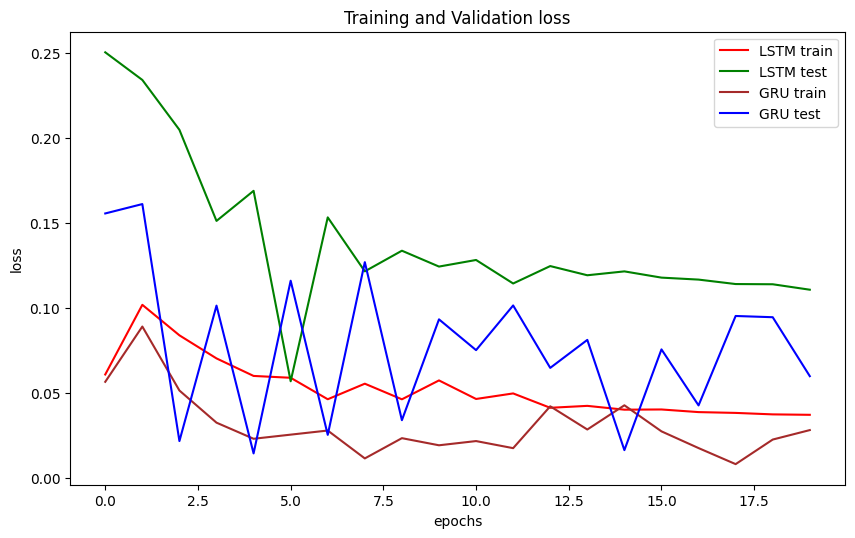

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(history_lstm.history['loss'], label='LSTM train', color='red')
plt.plot(history_lstm.history['val_loss'], label='LSTM test', color= 'green')
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Validation loss')
plt.show()

In [ ]:
y_pred = model_lstm.predict(X_test)

In [ ]:
y_pred

array([[[0.8677206 ],
        [0.9077284 ],
        [0.91485673],
        ...,
        [0.9735306 ],
        [0.97847795],
        [0.9695271 ]],

       [[0.87110204],
        [0.9053177 ],
        [0.9020171 ],
        ...,
        [0.9784778 ],
        [0.9695268 ],
        [0.9666941 ]],

       [[0.8701632 ],
        [0.8897859 ],
        [0.9139253 ],
        ...,
        [0.9695265 ],
        [0.9666939 ],
        [0.97567296]],

       ...,

       [[0.76975137],
        [0.8204863 ],
        [0.79410785],
        ...,
        [0.8159401 ],
        [0.81083184],
        [0.8093436 ]],

       [[0.7725112 ],
        [0.806482  ],
        [0.79964423],
        ...,
        [0.81083167],
        [0.8093435 ],
        [0.8144572 ]],

       [[0.7634413 ],
        [0.8180165 ],
        [0.79188   ],
        ...,
        [0.80934334],
        [0.81445694],
        [0.81185037]]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00143499, 0.00142472, 0.00145909, 0.00145049, 0.21475677,
       0.16911027, 0.01785714, 0.01086366, 0.00138611, 0.00143893,
       0.00150433, 0.01023407, 0.01      , 0.00137255, 0.0014019 ,
       0.00152457, 0.00150257, 0.01612905, 0.00132141, 0.00133131,
       0.00146176, 0.00145049, 0.21475677], dtype=float32)

In [ ]:
normal_scale = 1/0.00143499
normal_scale

696.8689677279981

In [ ]:
y_pred = y_pred * normal_scale
y_pred


array([[[604.68756],
        [632.56775],
        [637.5353 ],
        ...,
        [678.4232 ],
        [681.8709 ],
        [675.63336]],

       [[607.04395],
        [630.8878 ],
        [628.5877 ],
        ...,
        [681.8708 ],
        [675.6332 ],
        [673.6591 ]],

       [[606.3897 ],
        [620.06415],
        [636.88617],
        ...,
        [675.63293],
        [673.65894],
        [679.9162 ]],

       ...,

       [[536.41583],
        [571.7714 ],
        [553.3891 ],
        ...,
        [568.60333],
        [565.0435 ],
        [564.0064 ]],

       [[538.33905],
        [562.01227],
        [557.24725],
        ...,
        [565.0434 ],
        [564.00635],
        [567.56995]],

       [[532.01855],
        [570.05035],
        [551.8366 ],
        ...,
        [564.0062 ],
        [567.56976],
        [565.7533 ]]], dtype=float32)

In [ ]:
y_test = y_test * normal_scale
y_test 

array([624.91907, 635.66907, 626.3191 , 631.41907, 641.56903, 625.51904,
       634.01904, 635.3191 , 627.91907, 634.16907, 650.919  , 650.919  ,
       640.8691 , 637.969  , 631.91907, 626.91907, 606.9191 , 596.01904,
       598.9191 , 586.91907, 569.7691 , 580.86914, 586.7191 , 586.91907,
       587.81915, 599.51904, 591.9191 , 591.7191 , 589.31915, 594.91907,
       597.4191 , 600.51904, 604.6691 , 601.5691 , 599.8691 , 593.9191 ,
       593.9691 , 576.9691 , 588.4691 , 589.81915, 588.9691 , 594.86914,
       590.9191 , 594.7191 , 601.7191 , 595.86914, 597.9191 , 600.7191 ,
       600.06915, 611.91907, 605.71906, 604.91907, 605.11914, 603.9691 ,
       598.11914, 591.61914, 599.9191 , 589.2191 , 569.31915, 560.9192 ,
       567.1691 , 555.3192 , 567.9192 , 559.9192 , 542.26917, 546.7192 ,
       552.1692 , 534.7192 , 541.9192 , 533.9192 , 532.9192 , 531.8692 ,
       543.8192 , 552.9192 , 521.9192 , 518.91925, 506.91922, 526.8692 ,
       516.8192 , 506.91922, 481.91928, 494.91925, 

In [ ]:
mean_y_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

524.4402 599.86346


In [ ]:
accuracy = round((mean_y_test / mean_y_pred)*100,2)
accuracy

87.43

In [ ]:
gru_pred = model_gru.predict(X_test)

In [ ]:
scaler.scale_

array([0.00143499, 0.00142472, 0.00145909, 0.00145049, 0.21475677,
       0.16911027, 0.01628664, 0.00942507, 0.00138611, 0.00143893,
       0.00149408, 0.01023407, 0.01      , 0.00137255, 0.0014019 ,
       0.00152457, 0.00150257, 0.0141036 , 0.00132141, 0.00133131,
       0.00146176, 0.00145049], dtype=float32)

In [ ]:
scale = 1/0.00143499
scale

696.8689677279981

In [ ]:
gru_pred = gru_pred * scale
gru_pred

array([[524.58386],
       [518.35223],
       [513.9788 ],
       [521.6154 ],
       [517.3076 ],
       [515.69336],
       [517.36957],
       [538.40497],
       [529.84955],
       [534.80524],
       [529.20374],
       [521.20416],
       [513.2347 ],
       [513.1925 ],
       [509.7778 ],
       [507.62643],
       [499.6092 ],
       [503.7275 ],
       [531.1907 ],
       [532.29285],
       [531.9017 ],
       [532.40924],
       [526.4216 ],
       [527.8895 ],
       [522.8444 ],
       [522.5692 ],
       [518.8211 ],
       [512.63007],
       [517.4567 ],
       [512.1941 ],
       [510.79575],
       [505.43436],
       [500.87473],
       [498.5474 ],
       [502.06607],
       [498.4665 ],
       [498.2524 ],
       [496.22128],
       [505.66727],
       [501.69504],
       [503.07333],
       [496.52222],
       [490.80566],
       [490.794  ],
       [496.44135],
       [491.96878],
       [486.97046],
       [483.5077 ],
       [485.3809 ],
       [485.39798],


In [ ]:
gru_test = y_test * scale
gru_test 

array([393326.22, 391688.6 , 385347.06, 390259.97, 387158.94, 387681.6 ,
       386357.53, 399911.6 , 397263.53, 402002.2 , 393674.6 , 390190.3 ,
       378970.72, 374859.2 , 367890.5 , 357437.5 , 369632.66, 373465.44,
       381131.  , 405068.4 , 400016.1 , 393848.8 , 392489.9 , 392977.75,
       387019.5 , 389493.44, 381131.  , 378901.03, 382002.1 , 378831.34,
       377646.66, 380364.47, 372141.38, 371792.94, 375869.66, 373465.44,
       370643.12, 367228.47, 369981.1 , 369528.12, 369284.22, 363779.  ,
       359284.22, 353325.94, 355695.3 , 351096.  , 342106.4 , 341514.06,
       343500.12, 345590.72, 348378.22, 365103.03, 365346.94, 366496.75,
       356949.7 , 360852.2 , 355346.9 , 357228.44, 358761.53, 355033.3 ,
       351897.38, 374545.6 , 372071.72, 373639.66, 372315.6 , 367890.5 ,
       385312.22, 384963.75, 378343.53, 386009.1 , 386148.44, 391584.  ,
       393674.6 , 393047.4 , 383639.72, 379319.16, 378622.28, 380434.12,
       368622.2 , 367193.62, 370538.6 , 367193.62, 

In [ ]:
mean_gru_test = y_test.mean()
mean_y_pred = y_pred.mean()
print(mean_y_test, mean_y_pred)

525.4346 495.20105
